In [88]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [89]:
df = pd.read_csv('rice.csv')

df.head()

,Date,price
0,2021-09/23,57356
1,2021-09/24,57356
2,2021-09/27,56911
3,2021-09/28,56663
4,2021-09/29,56663


In [90]:
df.describe()

,price
count,242.000000
mean,50847.384298
std,3055.305294
min,45800.000000
25%,48080.000000
50%,51840.000000
75%,52680.000000
max,57356.000000


In [91]:
df = df.rename(columns={'Date' : 'ds', 'price' : 'y'})
df.head

<bound method NDFrame.head of              ds      y
0    2021-09/23  57356
1    2021-09/24  57356
2    2021-09/27  56911
3    2021-09/28  56663
4    2021-09/29  56663
..          ...    ...
237  2022-09/07  46700
238  2022-09/08  47033
239  2022-09/13  46983
240  2022-09/14  46888
241  2022-09/15  46350

[242 rows x 2 columns]>

<AxesSubplot:xlabel='ds'>

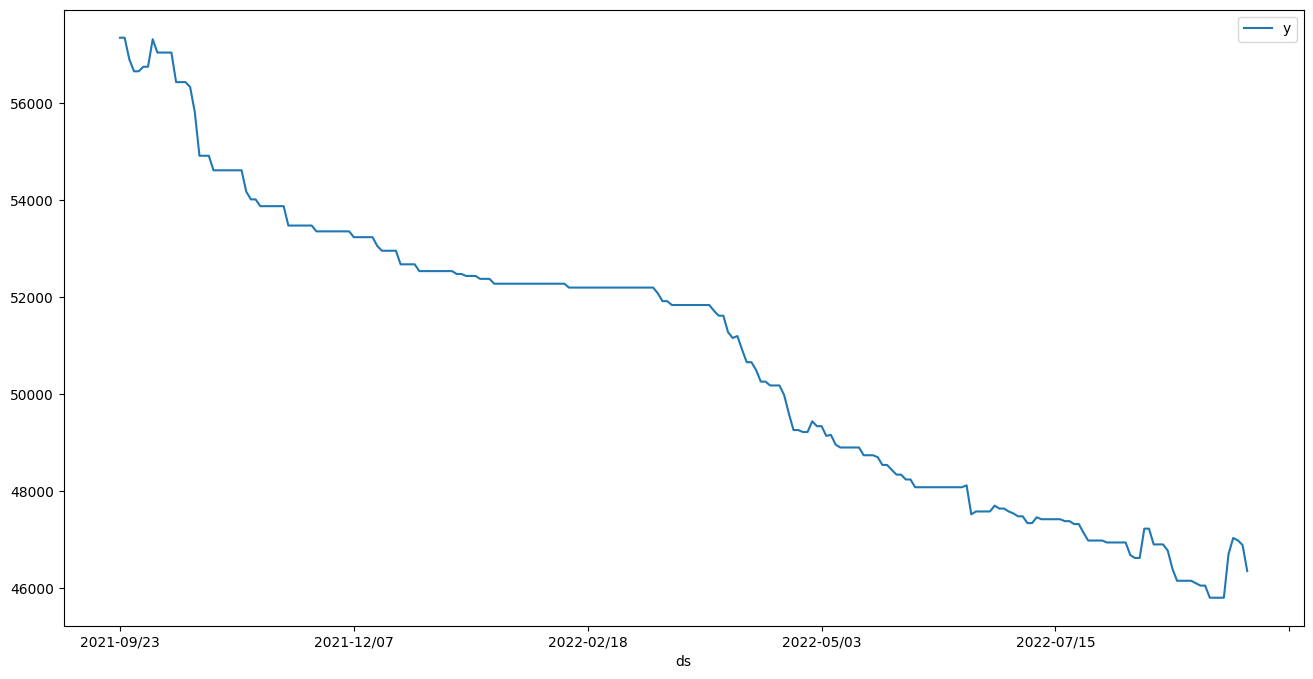

In [92]:
df.plot(x='ds', y='y', figsize=(16,8))

In [93]:
model = Prophet()

model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.07407
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1167.62      0.005277       926.573           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1182.54    0.00253024       257.452           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1189.02   0.000297888       387.101           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       1189.99   1.03282e-05       233.182   2.429e-08       0.001      458  LS failed, Hessian reset 
     399          1191    0.00196674       436.509           1           1      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1192.48     0.0026434    

/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [94]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast.tail()

/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
602,2023-09-11,38963.524618,15043.344096,63730.117075,14947.205811,63665.008302,8.896051,8.896051,8.896051,8.896051,8.896051,8.896051,0.0,0.0,0.0,38972.420669
603,2023-09-12,38943.773026,14869.399277,63719.187374,14910.302736,63745.715388,5.267834,5.267834,5.267834,5.267834,5.267834,5.267834,0.0,0.0,0.0,38949.040860
604,2023-09-13,38924.021434,14742.717996,63876.038195,14843.353531,63815.284394,-13.776402,-13.776402,-13.776402,-13.776402,-13.776402,-13.776402,0.0,0.0,0.0,38910.245033
605,2023-09-14,38904.269843,14845.128796,63891.917670,14740.176295,63884.643115,2.151815,2.151815,2.151815,2.151815,2.151815,2.151815,0.0,0.0,0.0,38906.421658
606,2023-09-15,38884.518251,14649.942835,64080.965881,14637.091840,63991.250231,-6.852147,-6.852147,-6.852147,-6.852147,-6.852147,-6.852147,0.0,0.0,0.0,38877.666104


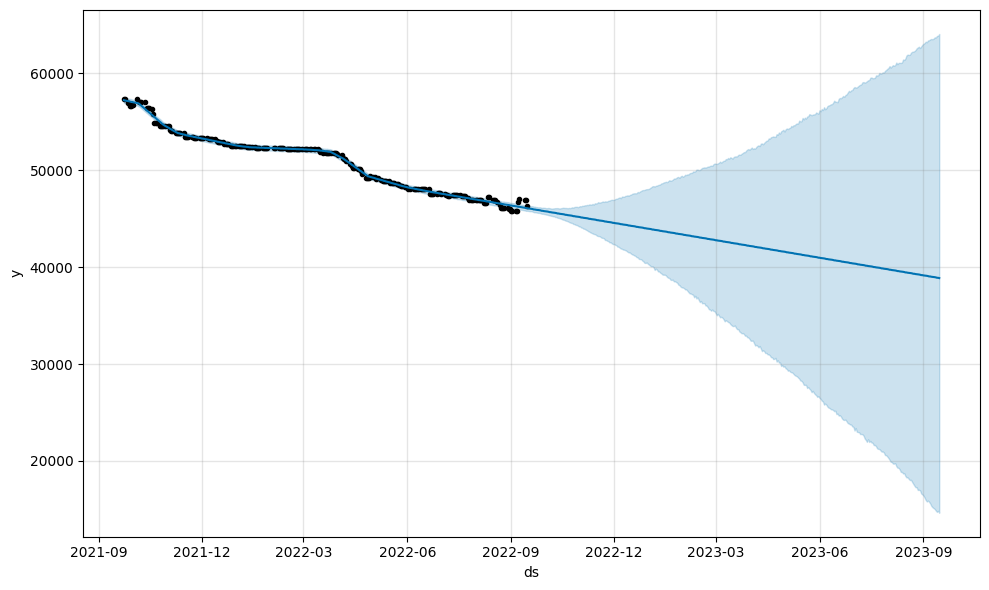

In [95]:
fig1 = model.plot(forecast)